In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp=pd.read_csv("Bias_correction.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
temp.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
temp['Date'] = pd.to_datetime(temp.Date)

In [7]:
temp['year'] = temp['Date'].dt.year 
temp['month'] = temp['Date'].dt.month 
temp['day'] = temp['Date'].dt.day 

In [8]:
temp.drop(['Date'],axis=1,inplace=True)

In [9]:
temp.shape

(7752, 27)

In [10]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
station             7750 non-null float64
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope               7752 non-null float64
Solar radia

In [11]:
temp.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
year                 2
month                2
day                  2
dtype: int64

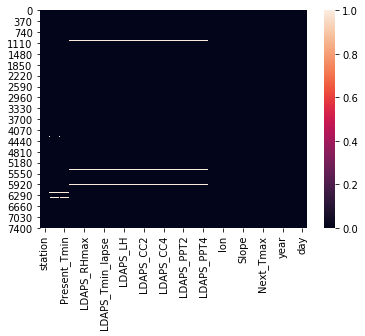

In [12]:
sns.heatmap(temp.isna())

In [13]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000000,7.467742,15.983871
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,1.414305,0.530334,8.918647
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


In [14]:
temp=temp.fillna(temp.mean())

In [15]:
temp=temp.dropna()

In [16]:
temp.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64

In [17]:
temp["DEM"]=(temp["DEM"]-temp["DEM"].min())/(temp["DEM"].max()-temp["DEM"].min())
temp["Solar radiation"]=(temp["Solar radiation"]-temp["Solar radiation"].min())/(temp["Solar radiation"].max()-temp["Solar radiation"].min())
temp["station"]=(temp["station"]-temp["station"].min())/(temp["station"].max()-temp["station"].min())
temp["Present_Tmax"]=(temp["Present_Tmax"]-temp["Present_Tmax"].min())/(temp["Present_Tmax"].max()-temp["Present_Tmax"].min())
temp["LDAPS_RHmin"]=(temp["LDAPS_RHmin"]-temp["LDAPS_RHmin"].min())/(temp["LDAPS_RHmin"].max()-temp["LDAPS_RHmin"].min())
temp["LDAPS_RHmax"]=(temp["LDAPS_RHmax"]-temp["LDAPS_RHmax"].min())/(temp["LDAPS_RHmax"].max()-temp["LDAPS_RHmax"].min())
temp["LDAPS_Tmax_lapse"]=(temp["LDAPS_Tmax_lapse"]-temp["LDAPS_Tmax_lapse"].min())/(temp["LDAPS_Tmax_lapse"].max()-temp["LDAPS_Tmax_lapse"].min())
temp["LDAPS_Tmin_lapse"]=(temp["LDAPS_Tmin_lapse"]-temp["LDAPS_Tmin_lapse"].min())/(temp["LDAPS_Tmin_lapse"].max()-temp["LDAPS_Tmin_lapse"].min())
temp["LDAPS_WS"]=(temp["LDAPS_WS"]-temp["LDAPS_WS"].min())/(temp["LDAPS_WS"].max()-temp["LDAPS_WS"].min())
temp["LDAPS_LH"]=(temp["LDAPS_LH"]-temp["LDAPS_LH"].min())/(temp["LDAPS_LH"].max()-temp["LDAPS_LH"].min())
temp["LDAPS_PPT1"]=(temp["LDAPS_PPT1"]-temp["LDAPS_PPT1"].min())/(temp["LDAPS_PPT1"].max()-temp["LDAPS_PPT1"].min())
temp["LDAPS_PPT2"]=(temp["LDAPS_PPT2"]-temp["LDAPS_PPT2"].min())/(temp["LDAPS_PPT2"].max()-temp["LDAPS_PPT2"].min())
temp["LDAPS_PPT3"]=(temp["LDAPS_PPT3"]-temp["LDAPS_PPT3"].min())/(temp["LDAPS_PPT3"].max()-temp["LDAPS_PPT3"].min())
temp["LDAPS_PPT4"]=(temp["LDAPS_PPT4"]-temp["LDAPS_PPT4"].min())/(temp["LDAPS_PPT4"].max()-temp["LDAPS_PPT4"].min())
temp["lat"]=(temp["lat"]-temp["lat"].min())/(temp["lat"].max()-temp["lat"].min())
temp["lon"]=(temp["lon"]-temp["lon"].min())/(temp["lon"].max()-temp["lon"].min())
temp["LDAPS_PPT1"]=(temp["LDAPS_PPT1"]-temp["LDAPS_PPT1"].min())/(temp["LDAPS_PPT1"].max()-temp["LDAPS_PPT1"].min())
temp["Present_Tmin"]=(temp["Present_Tmin"]-temp["Present_Tmin"].min())/(temp["Present_Tmin"].max()-temp["Present_Tmin"].min())
temp["Next_Tmax"]=(temp["Next_Tmax"]-temp["Next_Tmax"].min())/(temp["Next_Tmax"].max()-temp["Next_Tmax"].min())
temp["Next_Tmin"]=(temp["Next_Tmin"]-temp["Next_Tmin"].min())/(temp["Next_Tmin"].max()-temp["Next_Tmin"].min())
#temp[""]=(temp[""]-temp[""].min())/(temp[""].max()-temp[""].min())

In [18]:
temp.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,0.000000,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.207447,0.365853,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,2.7850,1.000000,0.544186,0.535135,2013.0,6.0,30.0
1,0.041667,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.148053,0.288703,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,0.786017,0.666667,0.161990,0.5141,0.925703,0.609302,0.605405,2013.0,6.0,30.0
2,0.083333,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.171575,0.150545,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,0.643008,0.750809,0.104702,0.2661,0.922242,0.637209,0.681081,2013.0,6.0,30.0
3,0.125000,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.145848,0.349446,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,1.000000,0.634304,0.166759,2.5348,0.918280,0.665116,0.702703,2013.0,6.0,30.0
4,0.166667,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.150325,0.535505,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,0.500530,1.000000,0.113360,0.5055,0.919835,0.641860,0.605405,2013.0,6.0,30.0


In [19]:
temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,0.003396,0.000694,0.006126,-0.002709,-0.008250,-0.012461,-0.010401,-2.375015e-01,-1.187044e-01,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293,0.000000e+00,3.641262e-18,-3.806511e-18
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,-0.144018,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-5.261489e-02,9.019776e-03,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741,5.980007e-02,1.459523e-01,-1.418534e-01
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,-0.002772,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-7.847529e-02,-4.346122e-02,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670,3.739568e-02,8.731509e-02,-1.061035e-01
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,8.709887e-02,-7.623712e-02,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019,-2.044507e-03,-1.890050e-01,-6.313598e-02
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,1.957977e-01,2.566694e-02,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997,-1.418320e-01,-1.178093e-01,-1.505018e-02
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-4.209291e-02,9.066575e-02,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868,1.617217e-02,9.734192e-02,-1.593779e-01
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-9.625683e-02,-2.670103e-02,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176,-4.693413e-03,2.338827e-02,-1.727315e-01
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,3.665702e-02,-5.946615e-02,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576,-1.113577e-01,-1.115865e-01,-4.068799e-02
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,1.332208e-01,2.582205e-02,5.513344e-02,8.678088e-02,-0.047384,0.157616,-0.055440,5.707733e-02,6.588749e-02,-2.080335e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-8.130615e-03,-6.842827e-03,-1.409033e-02,-2.075199e-02,0.218309,-0.452541,-0.011028,-6.647797e-02,-2.094583e-01,-2.529515e-02


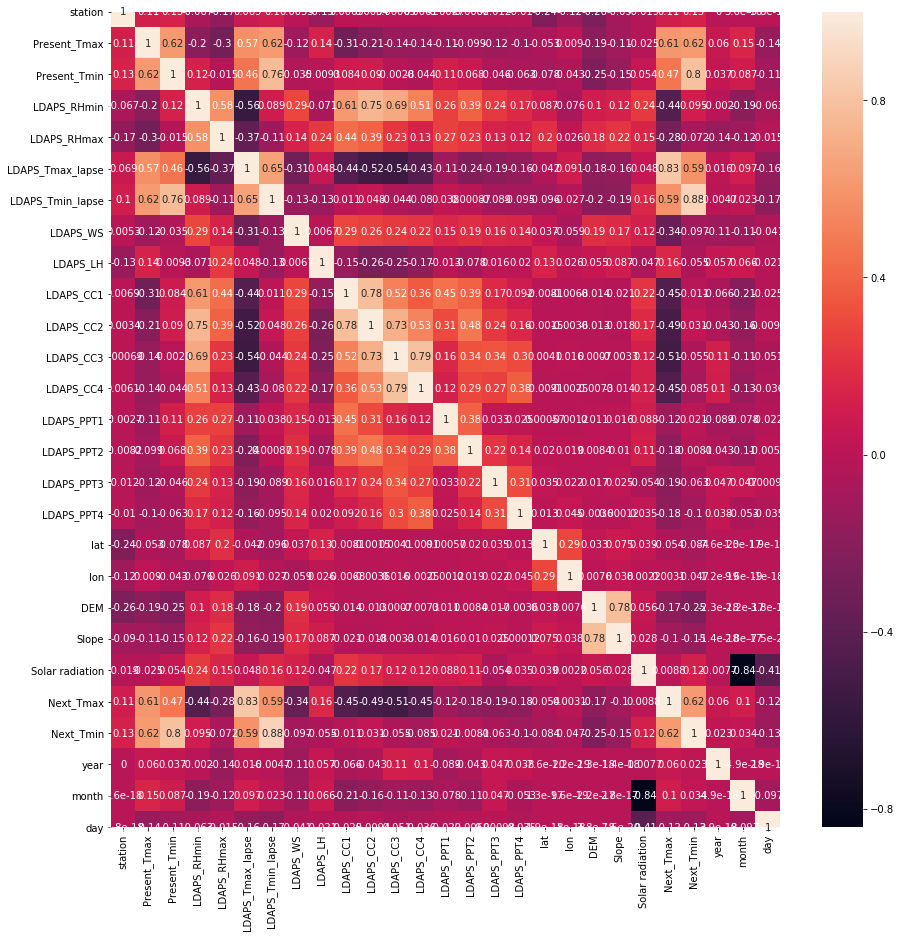

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(temp.corr(),annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

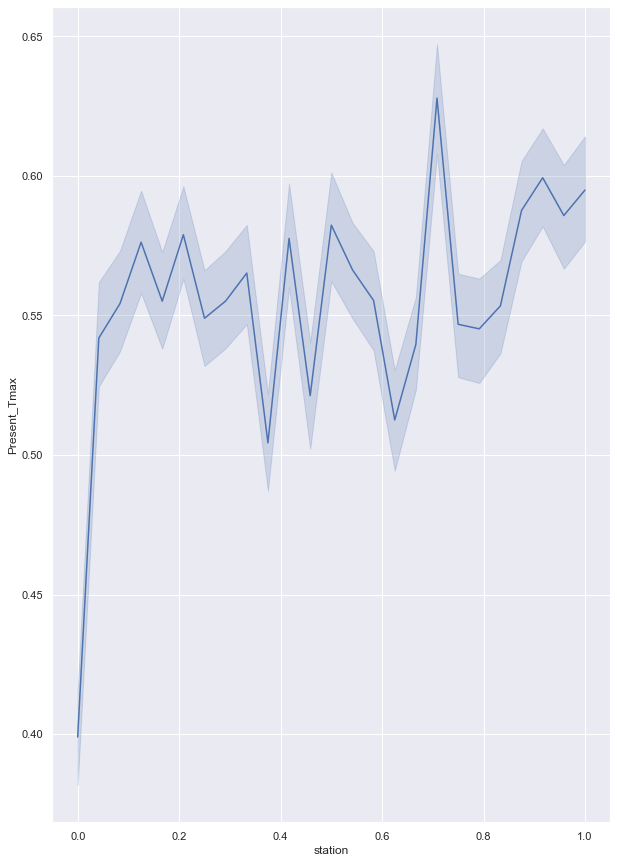

In [21]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="station",y="Present_Tmax",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

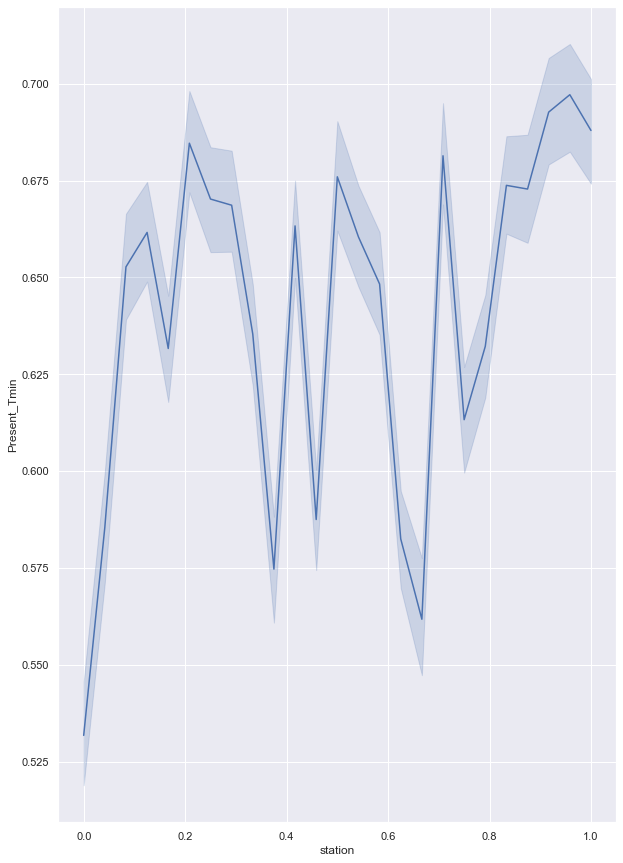

In [22]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="station",y="Present_Tmin",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

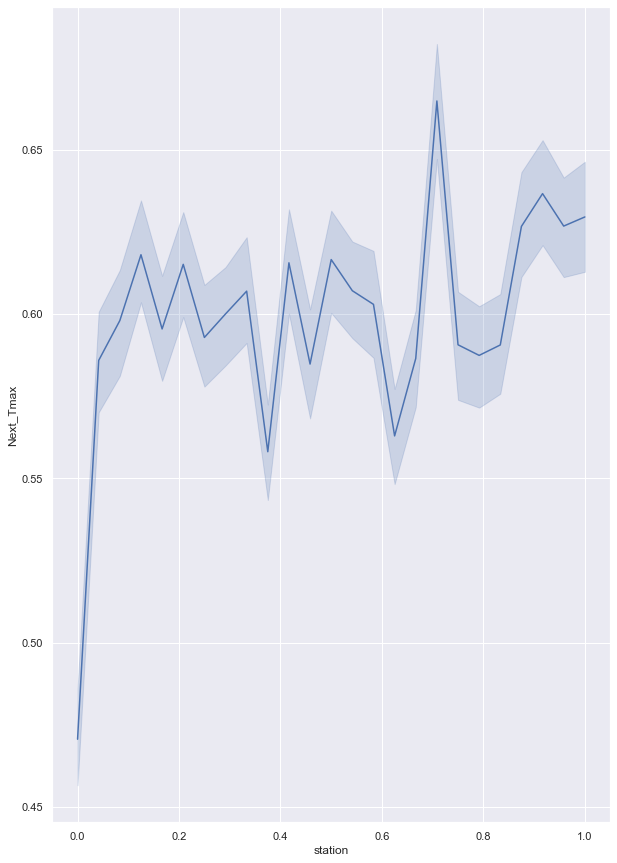

In [23]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="station",y="Next_Tmax",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

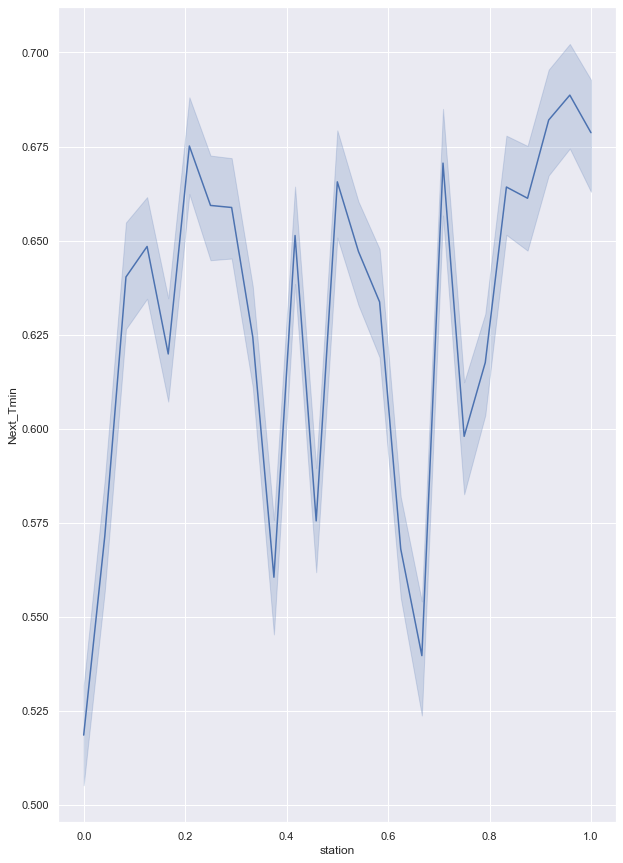

In [24]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="station",y="Next_Tmin",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

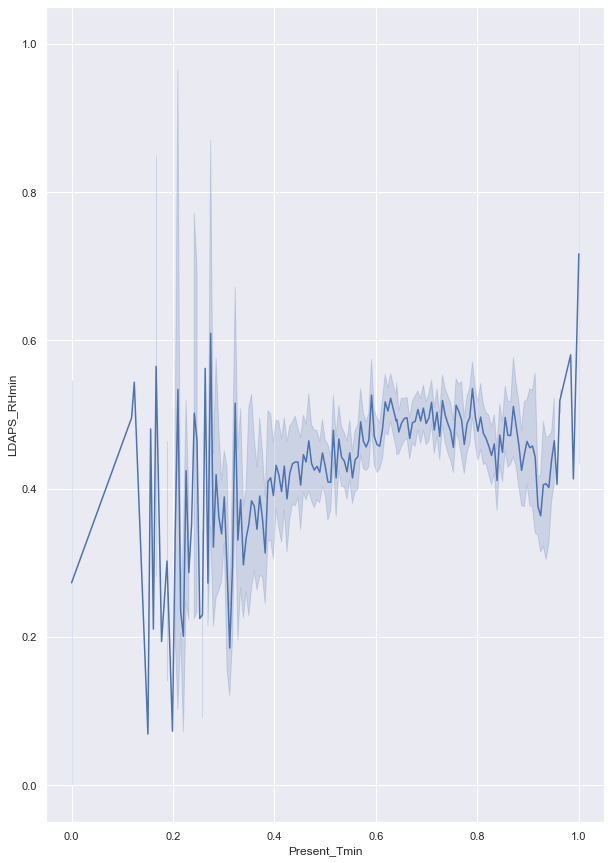

In [25]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Present_Tmin",y="LDAPS_RHmin",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

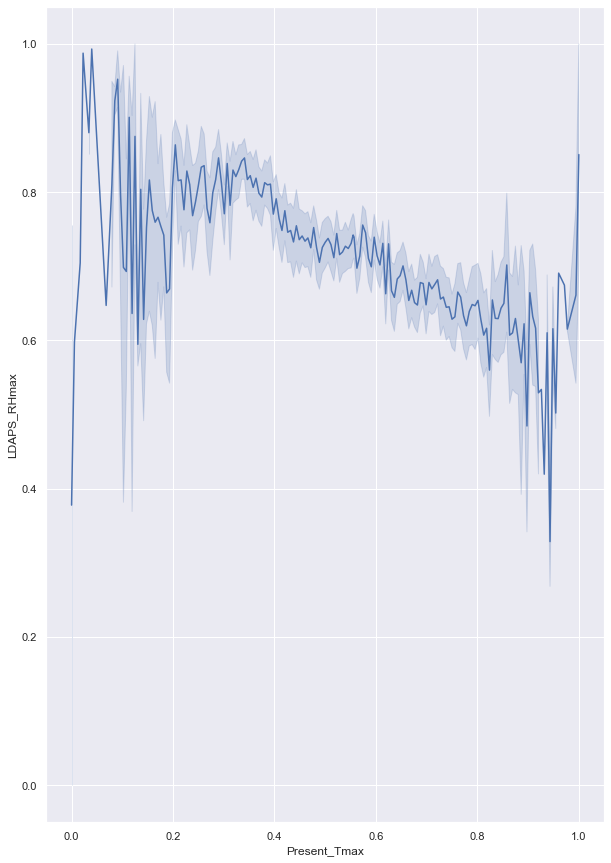

In [26]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Present_Tmax",y="LDAPS_RHmax",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

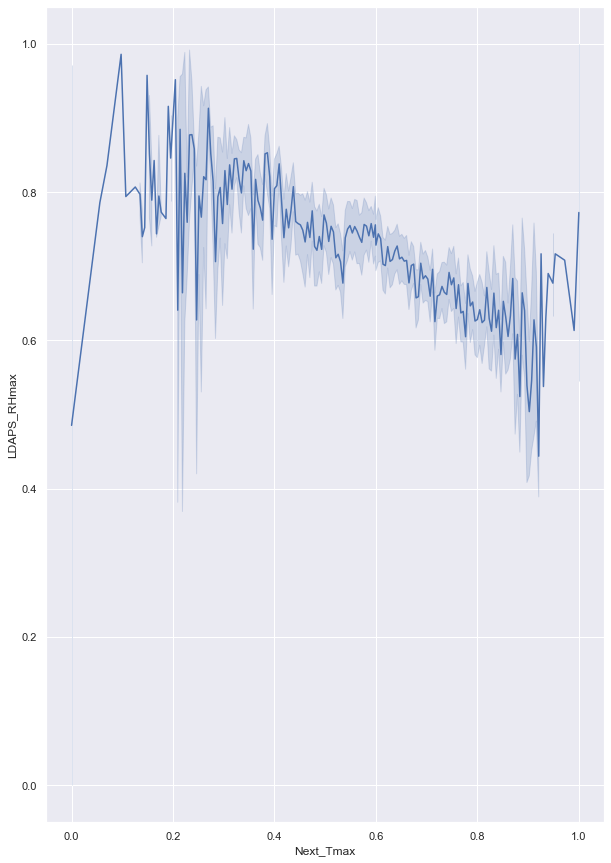

In [27]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Next_Tmax",y="LDAPS_RHmax",data=temp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

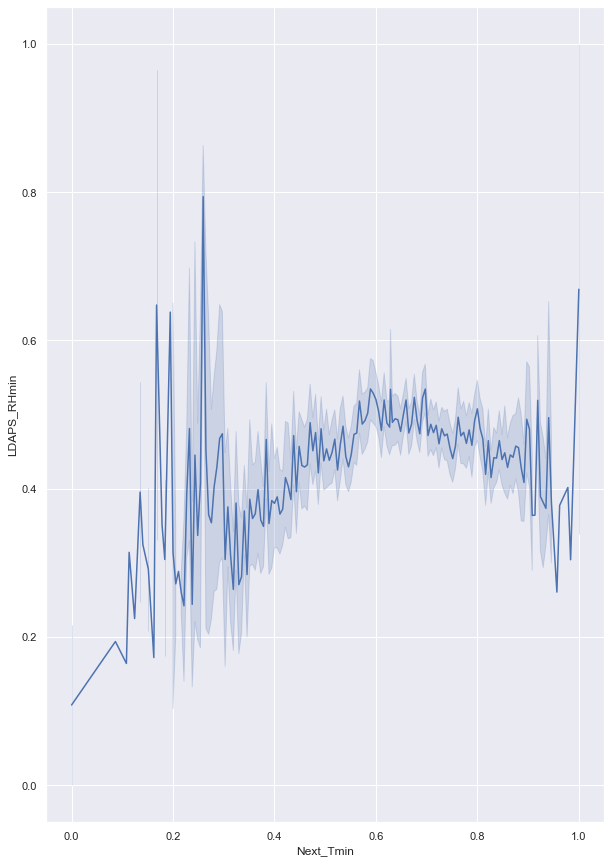

In [28]:
sns.set(rc={"figure.figsize":(10,15)})
sns.lineplot(x="Next_Tmin",y="LDAPS_RHmin",data=temp)
plt.show

In [29]:
temp.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
year                0.000000
month              -0.195889
day                -0.008926
dtype: float64

In [30]:
from scipy.stats import zscore

z_score=abs(zscore(temp))
print(temp.shape)
temp_final=temp.loc[(z_score<3).all(axis=1)]
print(temp_final.shape)

(7752, 27)
(6894, 27)


In [31]:
X= temp.drop(['Next_Tmax','Next_Tmin'], axis = 1)
print(X.shape)

(7752, 25)


In [32]:
y=temp[['Next_Tmax','Next_Tmin']]
print(y.shape)

(7752, 2)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [35]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("RandomForestRegressor",rf))

model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.80128191499262
MSE:  0.003959506501559517
Cross Validation:  0.6889595046666057


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.00015269328819123018
MSE:  0.019674082237420405
Cross Validation:  -0.21336788014767452


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.00015269328819123018
MSE:  0.019674082237420405
Cross Validation:  -0.21336788014767452


------------------- Ridge(alpha=1.0, copy_X=True, fit_inter

I Choose RandomForestRegressor as my final model because it perform very well on our dataset and also has good R2 score,
less Mean_Squared_Error and Good Cross_val_score.


R2_score:  0.8842749317926325

MSE:  0.0022817487651904207

Cross Validation:  0.6267887643265205



In [37]:
from sklearn.externals import joblib

joblib.dump(rf,'temp_joblib')

['temp_joblib']